In [95]:
#!pip install requests
!pip install --upgrade scikit-learn
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [96]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

import joblib as jb

import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
from scipy.io import arff


#importo los modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#importo las métricas

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import ipywidgets as widgets

#arboles
from sklearn import tree
from sklearn.tree import plot_tree

#bosque
from sklearn.ensemble import RandomForestClassifier


In [97]:
df=pd.read_csv('https://raw.githubusercontent.com/adiacla/bigdata/master/DatosEmpresa.csv')

In [98]:
df

indice      ANTIG   COMP  PROM    CATEG  COMINT  COMPPRES      RATE  \
0         0   9.139173  11621  2.84  5810.36   26441     43381  0.881519   
1         1   6.356319  10037  2.68  5018.61   28898     51339  1.621126   
2         2   7.213598  12015  4.61      NaN   29946     84812  1.801952   
3         3  12.342044  13867  3.27      NaN   28897     63472  2.187820   
4         4  12.794908   9497  3.14      NaN   23414     68474  1.759319   
..      ...        ...    ...   ...      ...     ...       ...       ...   
986     986   3.356411  10783  4.81  5391.40   21742     71897  3.219694   
987     987   8.572977   7590  4.03  3795.17   22195     57666  2.060401   
988     988   6.121557  13549  5.74  6774.37   25704     72683  2.621761   
989     989   4.806871  12402  3.77  6200.96   28162     74018  2.233593   
990     990   8.761118   9424  5.30  4712.07   51731     45487  3.684087   

     VISIT  DIASSINQ   TASARET      NUMQ      RETRE  TARGET CLASS  
0      7.0       644  0.879422  6.157047  17.729996             1  
1     54.0      1014  0.621552  7.463508  12.458385             0  
2      NaN      1154  0.957877  6.427984  13.994380             0  
3      NaN      1380  1.522692  5.765465  24.684088             1  
4      NaN       647  1.463812  7.095833  24.310326             1  
..     ...       ...       ...       ...        ...           ...  
986   68.0      1130  0.932976  7.200278   6.444309             0  
987   69.0      1694  1.202474  7.090742  16.631576             0  
988   73.0      1475  1.050995  7.722217  11.875821             0  
989   86.0       820  1.337147  7.737920   9.613742             1  
990   15.0      1297  0.522877  6.431972  16.996569             0  

[991 rows x 14 columns]

Cuál objetivo:

El objetivo del proyecto es realizar un modelo preditivo con el fin de determinar si un cliene se retira o no (churn). Est este dataframe inicialmente tiene 14, de las cuales la columna TARGET CLASS es la que identifica si un cliente histróricamente se ha retirado no.  El 1 significa que el se etró y el significa que mantubo.


#Analsis descriptivo de los datos


In [99]:
df.columns


Index(['indice', 'ANTIG', 'COMP', 'PROM', 'CATEG', 'COMINT', 'COMPPRES',
       'RATE', 'VISIT', 'DIASSINQ', 'TASARET', 'NUMQ', 'RETRE',
       'TARGET CLASS'],
      dtype='object')

In [100]:
df.describe().T

count          mean           std           min           25%  \
indice        991.0    495.000000    286.221360      0.000000    247.500000   
ANTIG         991.0      9.497262      2.903094      1.744117      7.423575   
COMP          991.0  11150.442987   2573.369787   4414.000000   9420.000000   
PROM          991.0      4.177608      1.458875      0.850000      3.080000   
CATEG         664.0   5521.862605   1312.684255   2206.990000   4665.845000   
COMINT        991.0  23853.453078   8064.382220   1576.000000  18006.000000   
COMPPRES      991.0  57289.598385  13483.420321  17517.000000  48325.500000   
RATE          991.0      2.361029      0.640561      0.655972      1.902048   
VISIT         576.0     57.913194     25.571508      2.000000     48.000000   
DIASSINQ      991.0   1073.362260    287.579264    299.000000    867.500000   
TASARET       991.0      1.158006      0.294427      0.365157      0.934168   
NUMQ          991.0      6.812902      1.021981      3.198464      6.111838   
RETRE         991.0     18.506699      5.654107      3.348704     14.375395   
TARGET CLASS  991.0      0.497477      0.500246      0.000000      0.000000   

                       50%           75%           max  
indice          495.000000    742.500000    990.000000  
ANTIG             9.392068     11.648336     17.217792  
COMP          11202.000000  13079.500000  18338.000000  
PROM              4.080000      5.150000      8.610000  
CATEG          5513.675000   6487.972500   9168.780000  
COMINT        23687.000000  29217.500000  57221.000000  
COMPPRES      57316.000000  66559.000000  91669.000000  
RATE              2.355008      2.808603      4.167256  
VISIT            63.000000     72.000000    130.000000  
DIASSINQ       1068.000000   1284.000000   1785.000000  
TASARET           1.165427      1.383318      1.885690  
NUMQ              6.877483      7.524972      9.469748  
RETRE            18.273995     22.615217     34.435583  
TARGET CLASS      0.000000      1.000000      1.000000

In [101]:
df.drop("indice",axis=1, inplace=True)

En el paso anterior estamos borrando el índice, porque el valor de cada instancia de la cacteristica indice es diferente para cada y no es útil para hacer preedcción.

In [102]:
df.isnull().sum()

ANTIG             0
COMP              0
PROM              0
CATEG           327
COMINT            0
COMPPRES          0
RATE              0
VISIT           415
DIASSINQ          0
TASARET           0
NUMQ              0
RETRE             0
TARGET CLASS      0
dtype: int64

In [103]:
print(f"El procentaje de nulos en VISIT es: {415/len(df):.2%}", )

El procentaje de nulos en VISIT es: 41.88%


In [104]:
df.drop(["CATEG","VISIT"],axis=1, inplace=True)

Borramos los (EXPLICAR POR QUÉ ...


In [105]:
df.isna().sum()

ANTIG           0
COMP            0
PROM            0
COMINT          0
COMPPRES        0
RATE            0
DIASSINQ        0
TASARET         0
NUMQ            0
RETRE           0
TARGET CLASS    0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANTIG         991 non-null    float64
 1   COMP          991 non-null    int64  
 2   PROM          991 non-null    float64
 3   COMINT        991 non-null    int64  
 4   COMPPRES      991 non-null    int64  
 5   RATE          991 non-null    float64
 6   DIASSINQ      991 non-null    int64  
 7   TASARET       991 non-null    float64
 8   NUMQ          991 non-null    float64
 9   RETRE         991 non-null    float64
 10  TARGET CLASS  991 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 85.3 KB


Dado que todas las columnas son muericas no se requiere numerizar, hacer variables dummies, ni usar encoders.

In [107]:
df["TARGET CLASS"].value_counts()

0    498
1    493
Name: TARGET CLASS, dtype: int64

La etiqueta está balanceada y por lo tanto no requiere técnicas de balaceo.

In [108]:
print(df["TARGET CLASS"].unique())

[1 0]


In [109]:
columnas=df.columns

#Analisis de correrlacion de los datos


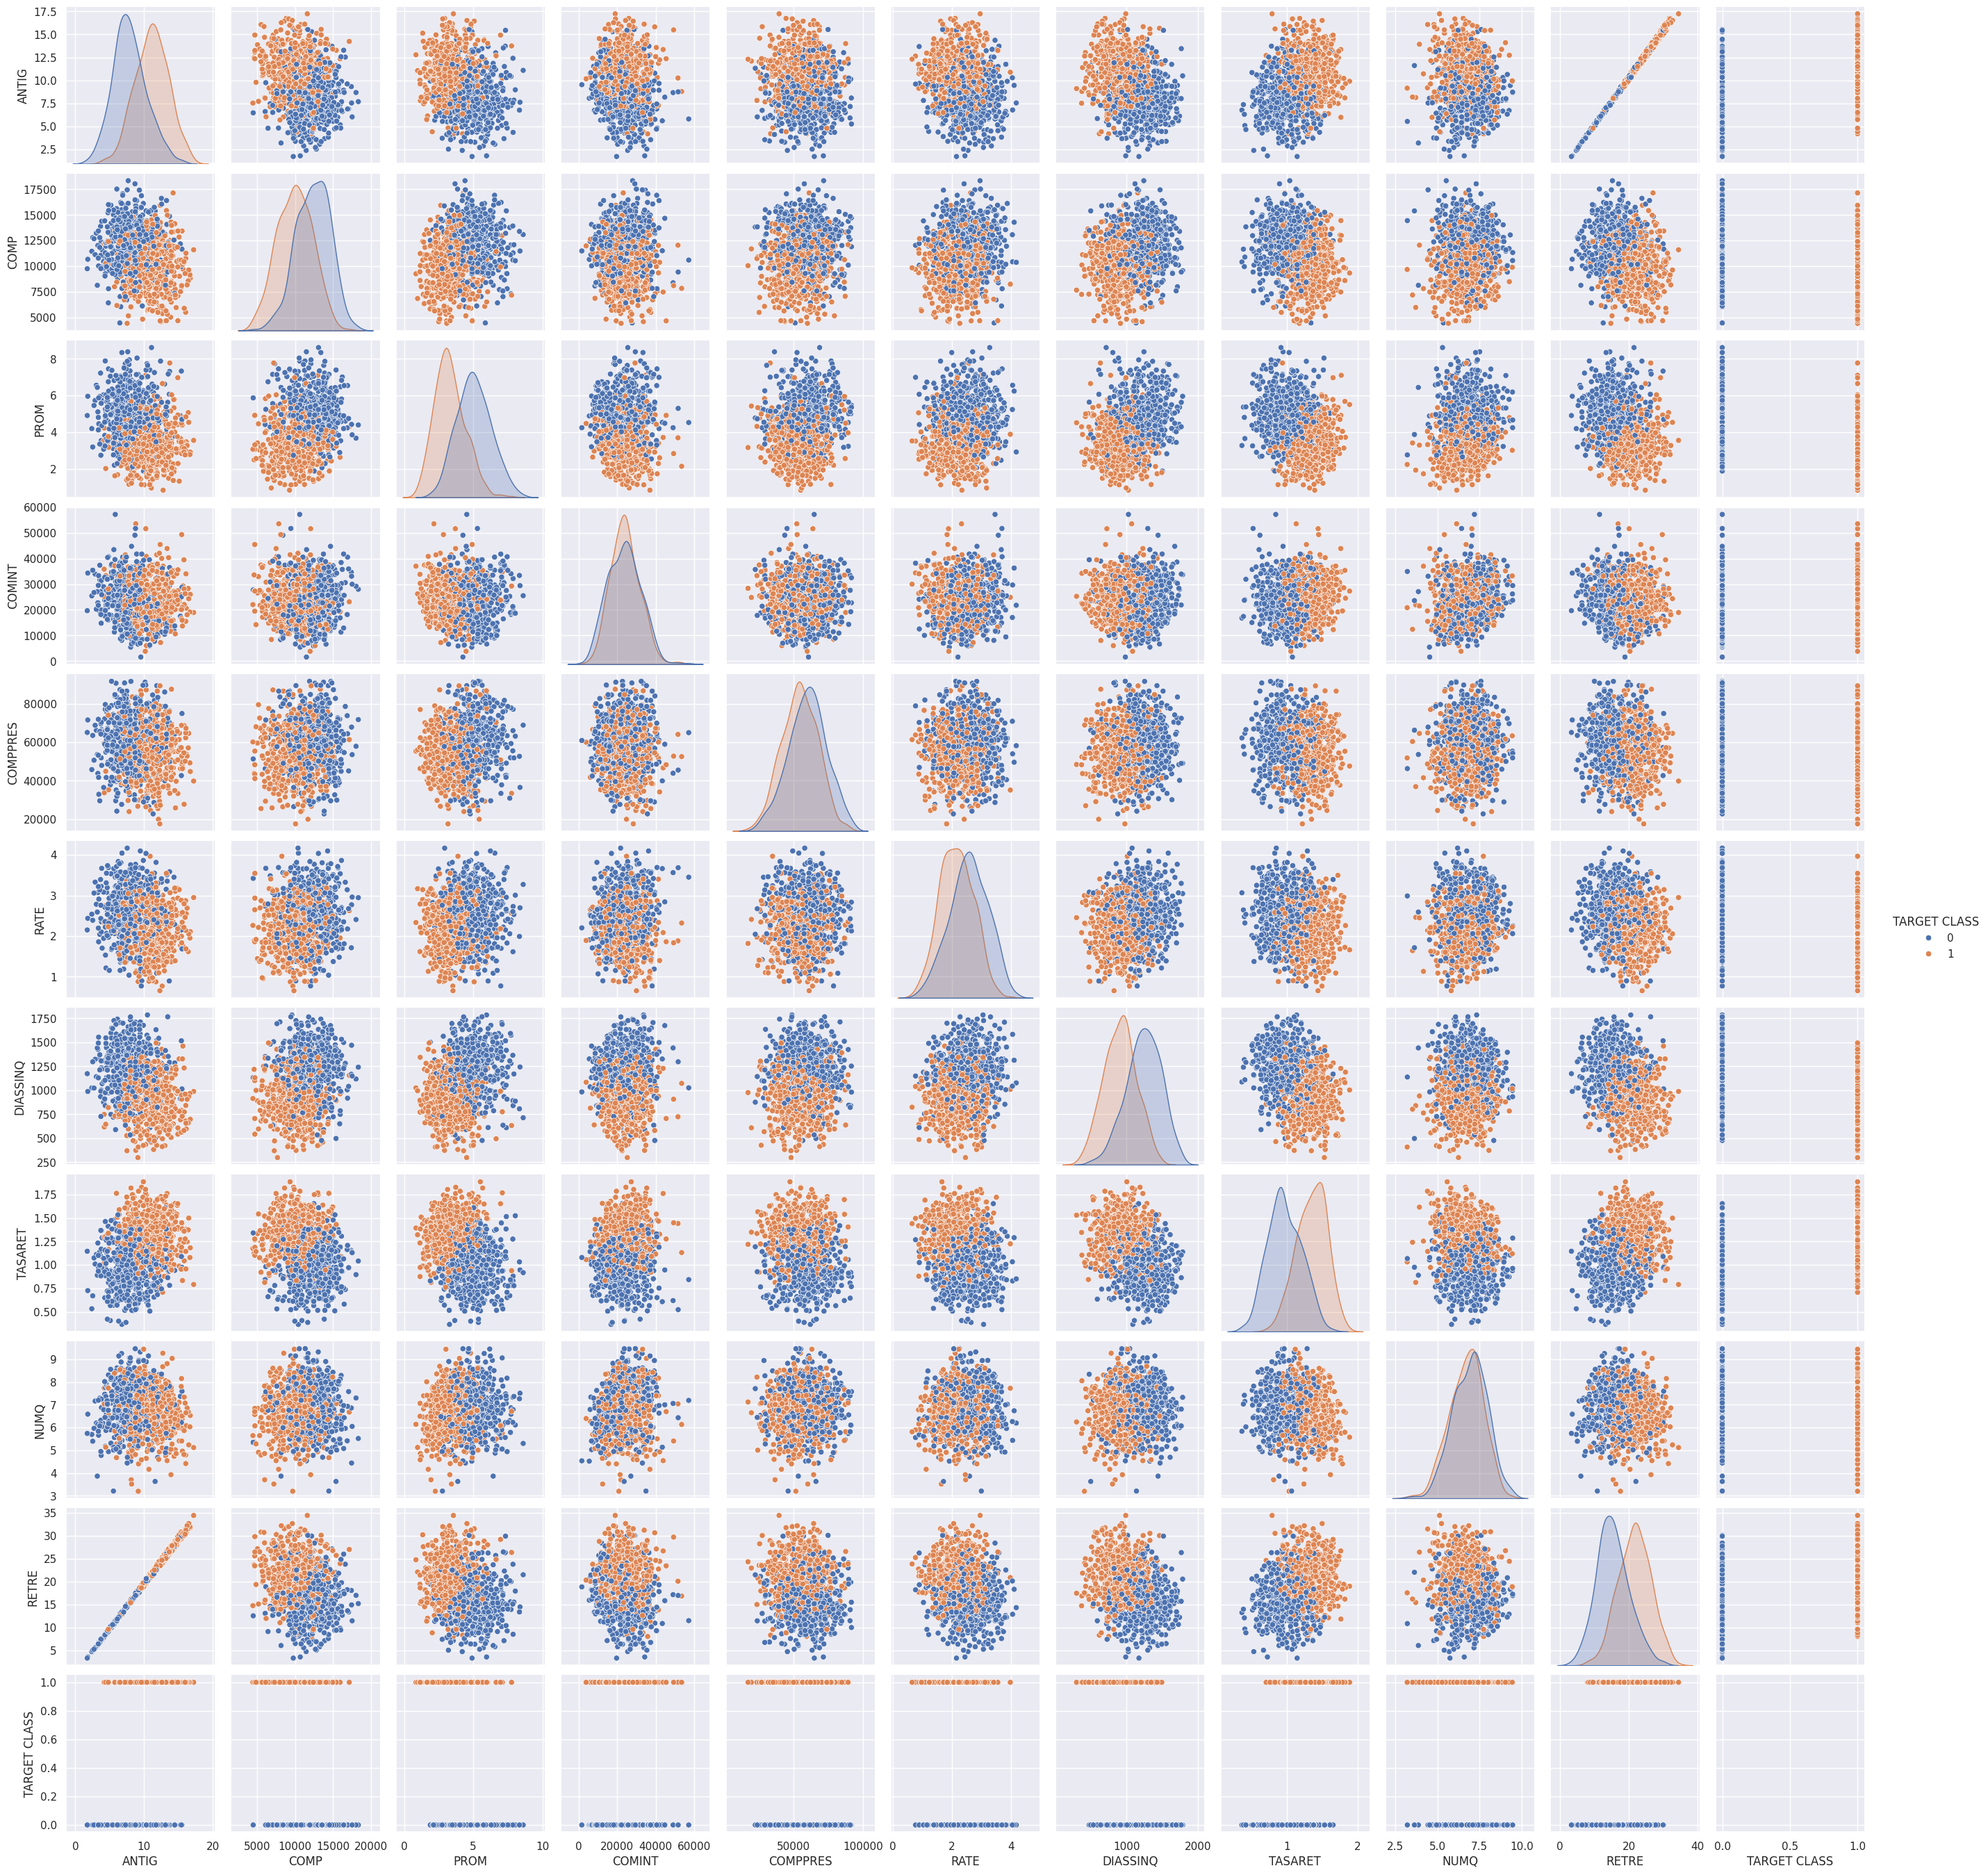

In [110]:
sns.set()
sns.pairplot(df, hue="TARGET CLASS",vars=columnas)
plt.show()

In [111]:
features=['ANTIG', 'COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE', 'TARGET CLASS']

In [112]:
corr_matrix=df[features].corr()

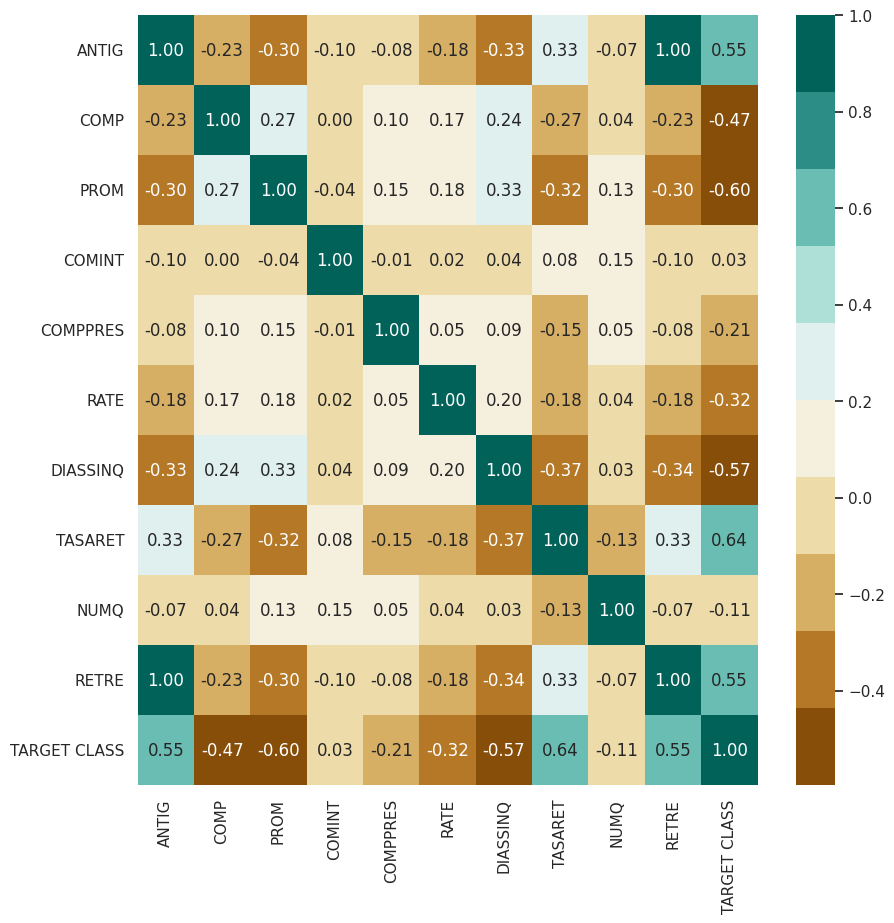

In [113]:
fig, ax=plt.subplots(figsize=(10,10)) #SIEMPRE
colormap=sns.color_palette("BrBG",10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

In [114]:
df['RETRE'].var(), df['ANTIG'].var()

(31.968927056112495, 8.427953653182012)

In [115]:
df.drop("ANTIG",axis=1, inplace=True)

Retor del dataset la columna ANTIG porque tiene menor varianza y ...

In [116]:
df.var()

COMP            6.622232e+06
PROM            2.128316e+00
COMINT          6.503426e+07
COMPPRES        1.818026e+08
RATE            4.103181e-01
DIASSINQ        8.270183e+04
TASARET         8.668720e-02
NUMQ            1.044445e+00
RETRE           3.196893e+01
TARGET CLASS    2.502462e-01
dtype: float64

#ANALSIS DE OUTlIERS

<Axes: >

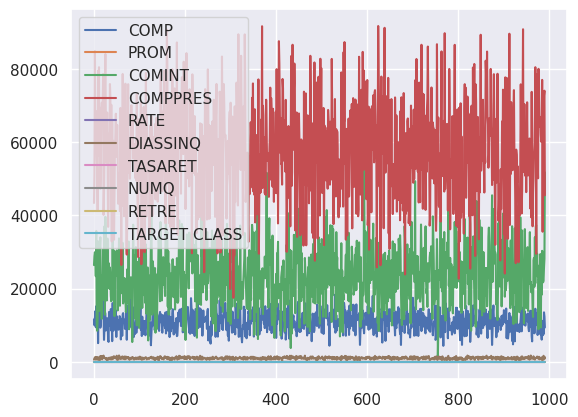

In [117]:
df.plot()

Text(0.5, 0.98, 'Box Plot de todos los Feature')

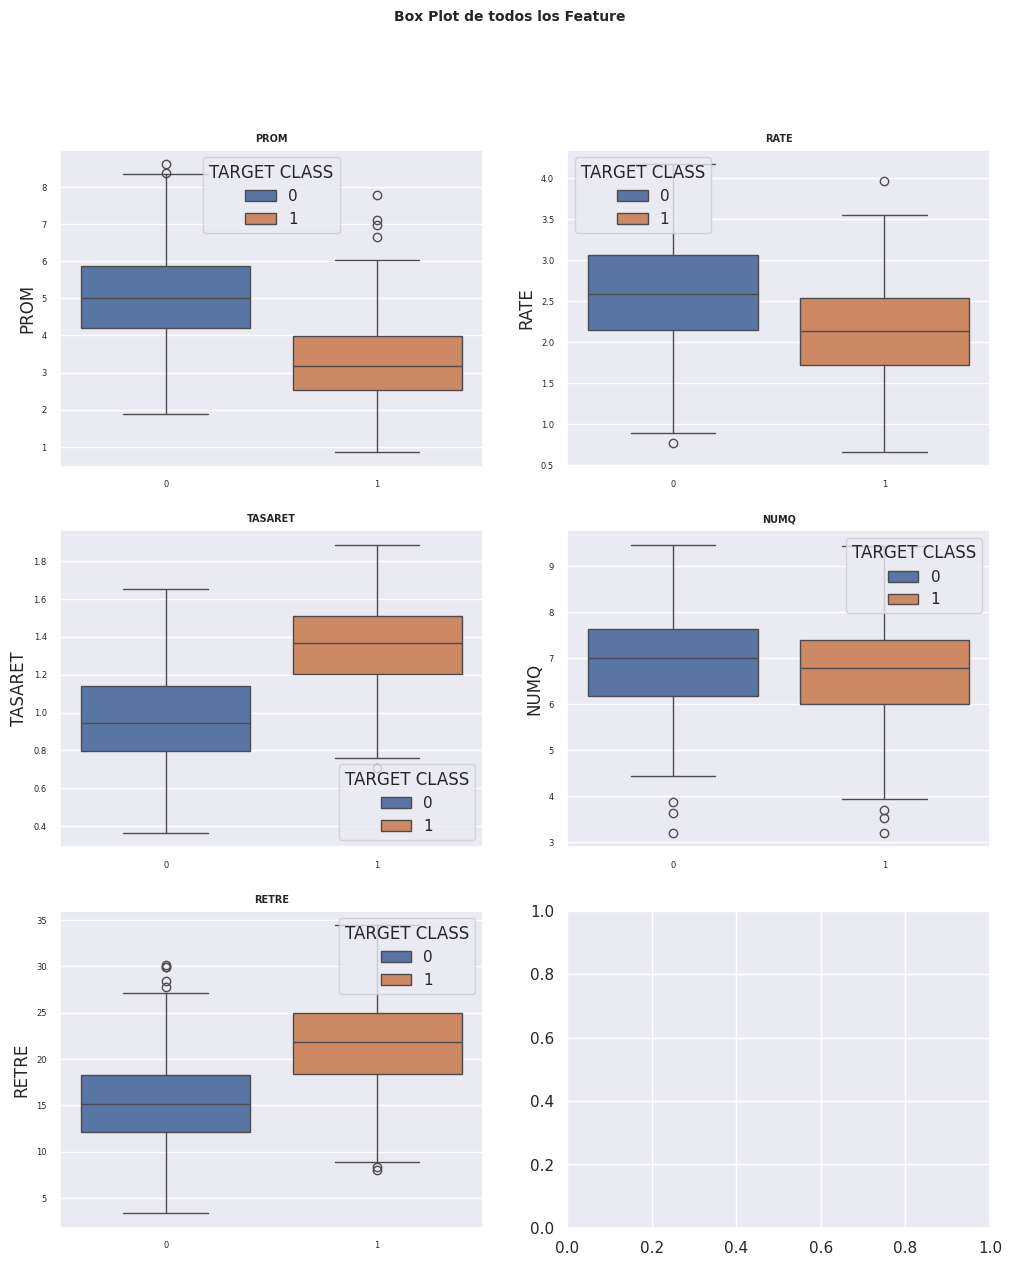

In [118]:
columnas=df.select_dtypes(include='float').columns


fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(12,14))
axes=axes.flat

for i,columna in enumerate(columnas):
  sns.boxplot(x='TARGET CLASS', y=columna, data=df, hue='TARGET CLASS',ax=axes[i])
  axes[i].set_title(columna,fontsize=7,fontweight="bold")
  axes[i].tick_params(labelsize=6)
  axes[i].set_xlabel("")

fig.suptitle("Box Plot de todos los Feature", fontsize=10, fontweight="bold")


In [119]:
df = df.drop(df[df['PROM']>8].index)
df = df.reset_index(drop=True)

<Axes: ylabel='RATE'>

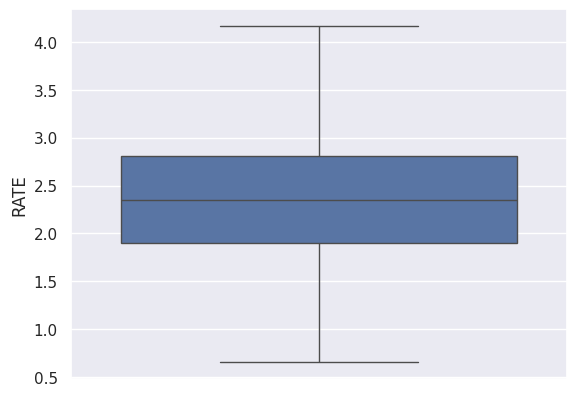

In [120]:
sns.boxplot(y='RATE', data=df)

<Axes: ylabel='RATE'>

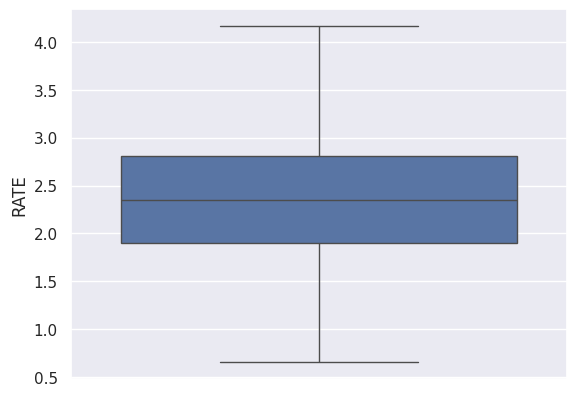

In [121]:
sns.boxplot(y='RATE', data=df)

In [122]:
df = df.drop(df[df['NUMQ']<4].index)
df = df.reset_index(drop=True)

<Axes: ylabel='NUMQ'>

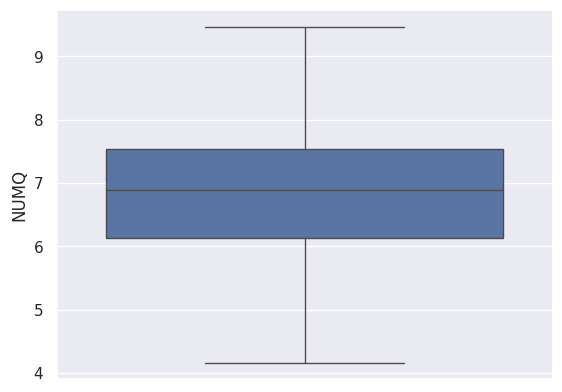

In [123]:
sns.boxplot(y='NUMQ', data=df)

<Axes: ylabel='RETRE'>

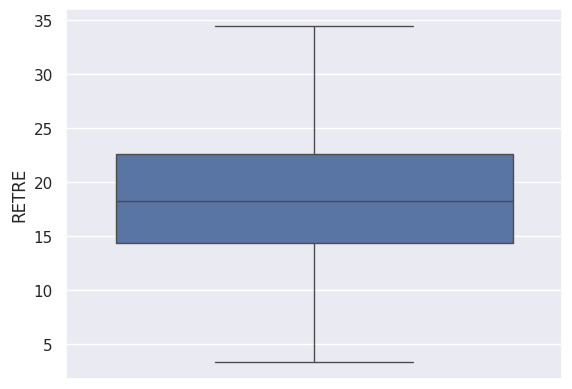

In [124]:
sns.boxplot(y='RETRE', data=df)

In [125]:
df.columns

Index(['COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ', 'TASARET',
       'NUMQ', 'RETRE', 'TARGET CLASS'],
      dtype='object')

In [126]:
colors=np.where(df["TARGET CLASS"]==0,"green","red")
def angulo (feature1,feature2,feature3):
  fig=plt.figure(figsize=(6,6))
  ax=fig.add_subplot(projection='3d')
  ax.scatter(df[feature1],df[feature2],df[feature3], c=colors, marker="*")
  ax.fontsize=5,
  ax.view_init(60,60)
  ax.set_xlabel(feature1)
  ax.set_ylabel(feature2)
  ax.set_zlabel(feature3)
  plt.show()

grafico=widgets.interact(angulo,feature1=['COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE'], feature2=['PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE'],feature3=['COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE'])


interactive(children=(Dropdown(description='feature1', options=('COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', …

#DIVIDIR LOS DATOS PRUEBA Y DE ENTRENAMIENTO

In [127]:
X=df.drop("TARGET CLASS", axis=1)
y=df["TARGET CLASS"]

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=454, stratify=df["TARGET CLASS"])

In [129]:
len(X_train),len(X_test),len(y_train),len(y_test)

(784, 196, 784, 196)

In [130]:
y_train.value_counts()

0    393
1    391
Name: TARGET CLASS, dtype: int64

In [131]:
y_test.value_counts()

1    98
0    98
Name: TARGET CLASS, dtype: int64

#Entrenar modelo Naive Bayes

In [132]:
modeloNB=GaussianNB()

In [133]:
modeloNB.fit(X_train,y_train)

GaussianNB()

In [134]:
y_pred = modeloNB.predict(X_test)


In [135]:
#Descargar el Archivo del Modelo

jb.dump(modeloNB,"modeloNB.bin",compress=True)

['modeloNB.bin']

In [136]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [137]:
probabilidad=modeloNB.predict_proba(X_test)

In [138]:
print(probabilidad)

[[4.70160112e-03 9.95298399e-01]
 [9.95849476e-01 4.15052372e-03]
 [3.54517201e-03 9.96454828e-01]
 [3.01307980e-01 6.98692020e-01]
 [4.39250010e-02 9.56074999e-01]
 [9.97880110e-01 2.11988961e-03]
 [6.25401175e-03 9.93745988e-01]
 [9.99690809e-01 3.09190668e-04]
 [9.87080857e-01 1.29191428e-02]
 [9.16675352e-02 9.08332465e-01]
 [9.68916840e-01 3.10831601e-02]
 [1.90566140e-03 9.98094339e-01]
 [1.01918982e-02 9.89808102e-01]
 [2.09554168e-03 9.97904458e-01]
 [9.88764613e-01 1.12353873e-02]
 [8.48947133e-01 1.51052867e-01]
 [2.94159961e-02 9.70584004e-01]
 [1.51130785e-03 9.98488692e-01]
 [7.50078666e-05 9.99924992e-01]
 [5.43670235e-01 4.56329765e-01]
 [9.91793142e-01 8.20685848e-03]
 [6.07595731e-01 3.92404269e-01]
 [9.99069477e-01 9.30522882e-04]
 [1.19331189e-03 9.98806688e-01]
 [3.13957088e-02 9.68604291e-01]
 [9.97969254e-01 2.03074584e-03]
 [6.71307550e-01 3.28692450e-01]
 [1.53746164e-01 8.46253836e-01]
 [9.98727014e-01 1.27298570e-03]
 [5.15009733e-02 9.48499027e-01]
 [1.654030

In [139]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [140]:
scoreNaive=modeloNB.score(X_test,y_test)
scoreNaive

0.9693877551020408

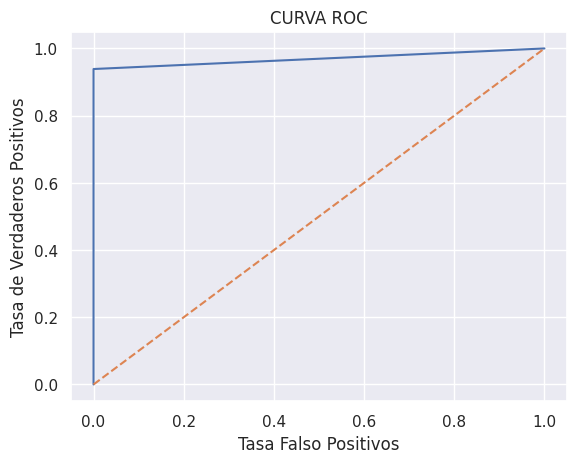

In [141]:
fpr,tpr,umbral=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

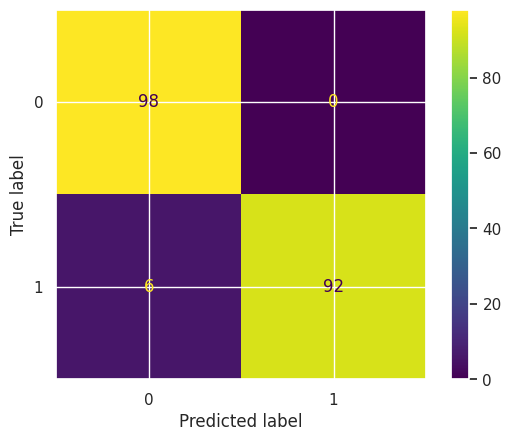

In [142]:
matrix=confusion_matrix(y_test,y_pred)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix= matrix,display_labels=modeloNB.classes_)
mostrarMatrix.plot()

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        98
           1       1.00      0.94      0.97        98

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        98
           1       1.00      0.94      0.97        98

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



In [145]:
print("Area bajo la curva",auc(fpr,tpr))

Area bajo la curva 0.9693877551020409


In [146]:
# MODELO DE ARBOL DE DECISION

In [147]:
#IMPORTO LOS MODELOS
from sklearn import tree
from sklearn.model_selection import train_test_split

#Plotear el arbol de decision
from sklearn.tree import plot_tree

Vamos a probar con varios árboles y escoger el que nos dé mejor accuracy. Para eso vamos a usar ParameterGrid
Se puede usar para iterar sobre combinaciones de valores de parámetros. El orden de las combinaciones de parámetros generadas es definida por el usuario

In [148]:
from sklearn.model_selection import ParameterGrid

In [149]:
parametros= ParameterGrid(
    {'min_samples_split':[4,6,8,10],
     'max_features':[1,2,3,4],
     'max_depth':[None,4,6,8],
     'criterion':['gini','entropy']})

In [150]:
resultados={'parametrosfinal':[],'score':[]}

In [151]:
#Recorremos todos los parámetros y entrenamos un modelo por cada uno
for parametro in parametros:
  modeloArbol=tree.DecisionTreeClassifier(random_state=444,
                                          ** parametro)
  modeloArbol.fit(X_train,y_train)
  resultados['parametrosfinal'].append(parametro)
  resultados['score'].append(modeloArbol.score(X_test,y_test))
  print(f"Modelo : {parametro} ",modeloArbol.score(X_test, y_test))


Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 4}  0.8571428571428571
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 6}  0.8724489795918368
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 8}  0.8571428571428571
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 10}  0.8877551020408163
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 4}  0.9030612244897959
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 6}  0.8724489795918368
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 8}  0.8367346938775511
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 10}  0.8877551020408163
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 4}  

In [152]:
# Resultados de los árobles creados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametrosfinal'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('score', ascending=False)
resultados = resultados.drop(columns=('parametrosfinal'))
resultados.head(10)

score criterion  max_depth  max_features  min_samples_split
15   0.928571      gini        NaN             4                 10
56   0.928571      gini        8.0             3                  4
100  0.928571   entropy        6.0             2                  4
14   0.923469      gini        NaN             4                  8
47   0.923469      gini        6.0             4                 10
73   0.918367   entropy        NaN             3                  6
122  0.918367   entropy        8.0             3                  8
106  0.918367   entropy        6.0             3                  8
45   0.918367      gini        6.0             4                  6
104  0.918367   entropy        6.0             3                  4

#Creamos el modelo con el mejor arbol

In [153]:
modeloArbol=tree.DecisionTreeClassifier(min_samples_split=10,
                                        max_features=4,
                                        max_depth=None,
                                        criterion='gini',
                                        random_state=444)

In [154]:
#Entrenar el modelo, fit()
modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier(max_features=4, min_samples_split=10, random_state=444)

In [155]:
scoreArbol=modeloArbol.score(X_train, y_train)
scoreArbol

0.9630102040816326

In [156]:
jb.dump(modeloArbol, "ModeloArbol.bin", compress=True)

['ModeloArbol.bin']

In [157]:
#The classes labels
modeloArbol.classes_

array([0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

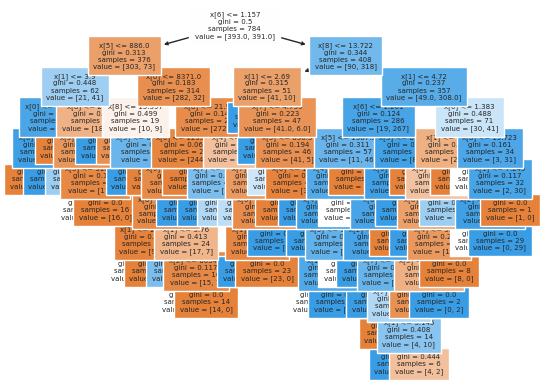

In [158]:
tree.plot_tree(modeloArbol,filled=True, fontsize=5)
plt.savefig("Modelo Arbol.jpg")
plt.show

In [159]:
modeloArbol.max_features_

4

In [160]:
modeloArbol.feature_names_in_

array(['COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE'], dtype=object)

In [161]:
print(tree.export_text(modeloArbol,feature_names=['COMP', 'PROM', 'COMINT', 'COMPPRES', 'RATE', 'DIASSINQ',
       'TASARET', 'NUMQ', 'RETRE']))

|--- TASARET <= 1.16
|   |--- DIASSINQ <= 886.00
|   |   |--- PROM <= 3.90
|   |   |   |--- COMP <= 13968.50
|   |   |   |   |--- RETRE <= 7.76
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- RETRE >  7.76
|   |   |   |   |   |--- class: 1
|   |   |   |--- COMP >  13968.50
|   |   |   |   |--- class: 0
|   |   |--- PROM >  3.90
|   |   |   |--- RETRE <= 26.32
|   |   |   |   |--- DIASSINQ <= 605.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DIASSINQ >  605.50
|   |   |   |   |   |--- COMPPRES <= 51836.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- COMPPRES >  51836.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- RETRE >  26.32
|   |   |   |   |--- class: 1
|   |--- DIASSINQ >  886.00
|   |   |--- COMP <= 8371.00
|   |   |   |--- RETRE <= 15.40
|   |   |   |   |--- class: 0
|   |   |   |--- RETRE >  15.40
|   |   |   |   |--- COMPPRES <= 62309.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- COMPPRES >  62309.00
|   |   |   |   | 

In [162]:
#Se crea una tabla con los datos de la matriz
y_pred=modeloArbol.predict(X_test)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[92,  6],
       [ 8, 90]])

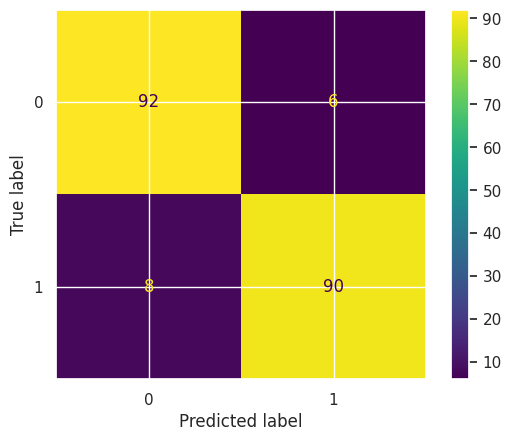

In [163]:
matrix=confusion_matrix(y_test,y_pred)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix= matrix,display_labels=modeloArbol.classes_)
mostrarMatrix.plot()

BOSQUE ALEATORIO

In [164]:
parametros= ParameterGrid(
    {'n_estimators':[20,40,60,80,100,120],
     'max_features':[3,4,5,6,7,8,9],
     'max_depth':[None,6,8,10,12,14],
     'criterion':['gini','entropy']})

In [165]:
resultados={'parametrosfinal':[],'oobs_score':[]}

In [166]:
for parametro in parametros:
   modeloBosque = RandomForestClassifier( oob_score=True,
                                          random_state=444,
                                          ** parametro)
   modeloBosque.fit(X,y)
   resultados['parametrosfinal'].append(parametro)
   resultados['oobs_score'].append(modeloBosque.oob_score_)
   print(f"Modelo : {parametro} \u2713", modeloBosque.oob_score_)

Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 20} ✓ 0.9163265306122449
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 40} ✓ 0.926530612244898
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 60} ✓ 0.9326530612244898
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 80} ✓ 0.9275510204081633
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 100} ✓ 0.9285714285714286
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 120} ✓ 0.9255102040816326
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 20} ✓ 0.9183673469387755
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 40} ✓ 0.9295918367346939
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 60} ✓ 0.9295918367346939
Modelo : 

In [167]:
# Resultados de Bosque Aleatorio
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametrosfinal'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oobs_score', ascending=False)
resultados = resultados.drop(columns=('parametrosfinal'))
resultados.head()

oobs_score criterion  max_depth  max_features  n_estimators
296    0.940816   entropy        6.0             3            60
299    0.937755   entropy        6.0             3           120
298    0.936735   entropy        6.0             3           100
128    0.935714      gini       10.0             3            60
297    0.934694   entropy        6.0             3            80

Creamos el bosque con el mejor resultado del Score en los datos de validacion.  Se toma la totalidad de los datos (X) y no X_train porque se usa bootstrap y se utiliza el score de los out of bag (oob)

In [168]:
modeloBosque = RandomForestClassifier(n_estimators=60,
                                      criterion="entropy",
                                      bootstrap=True,
                                      max_features=3,
                                      max_depth=6,
                                      oob_score=True,
                                      random_state=444)

In [169]:
modeloBosque.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=3,
                       n_estimators=60, oob_score=True, random_state=444)

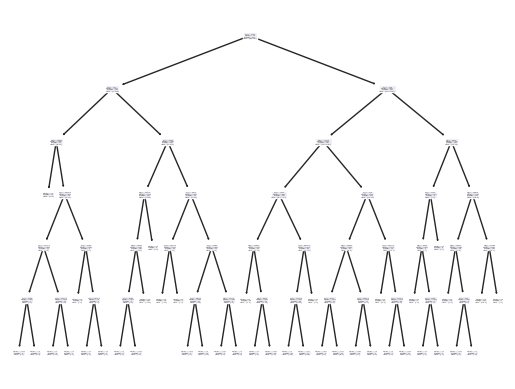

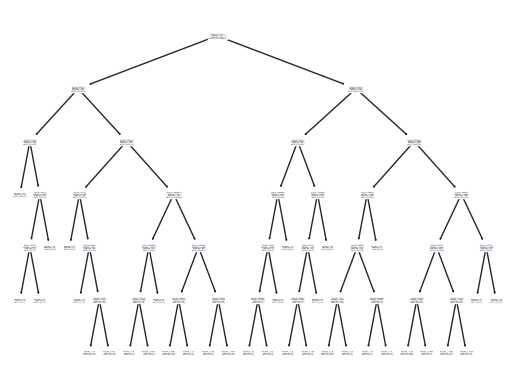

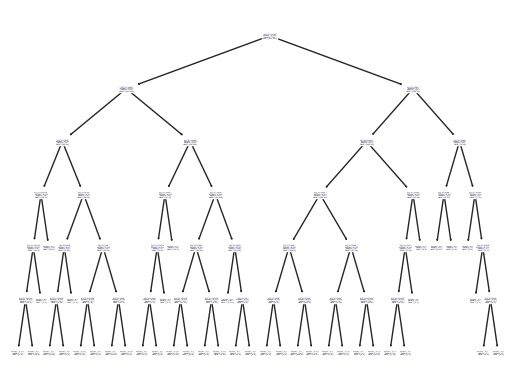

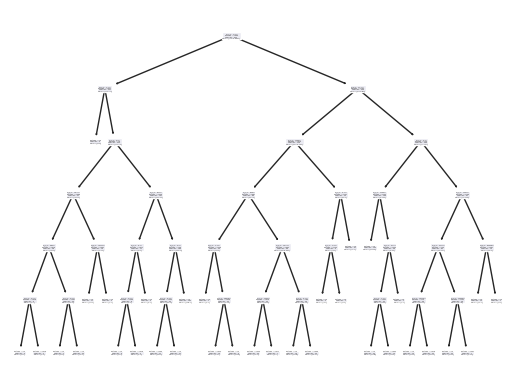

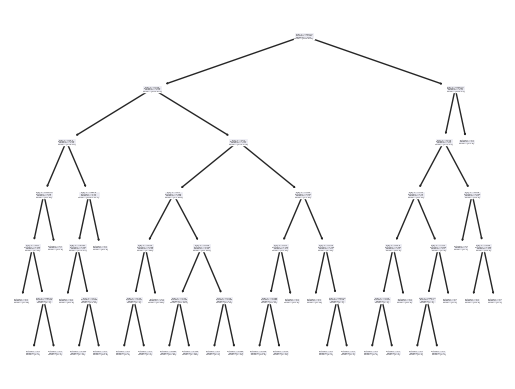

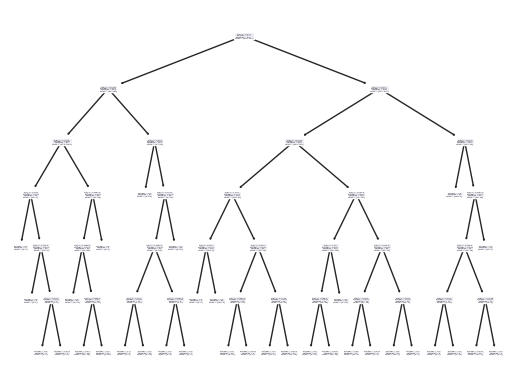

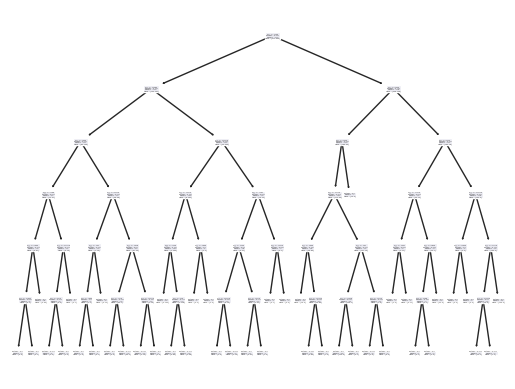

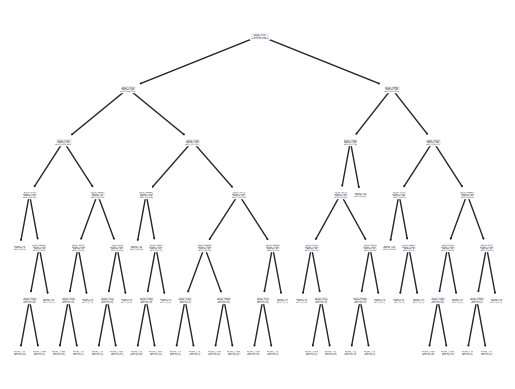

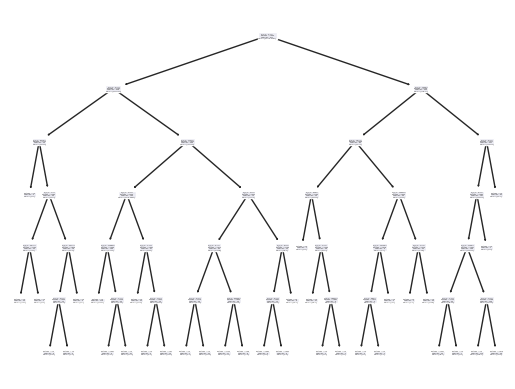

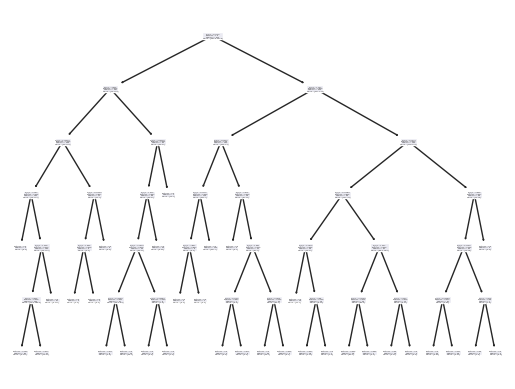

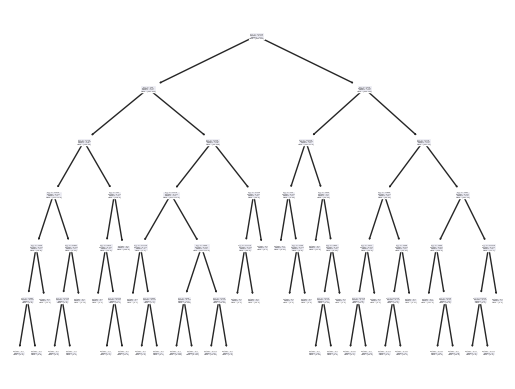

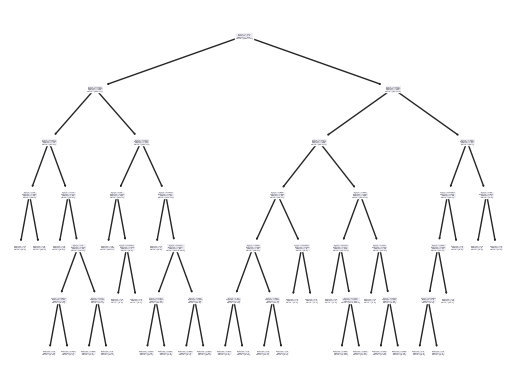

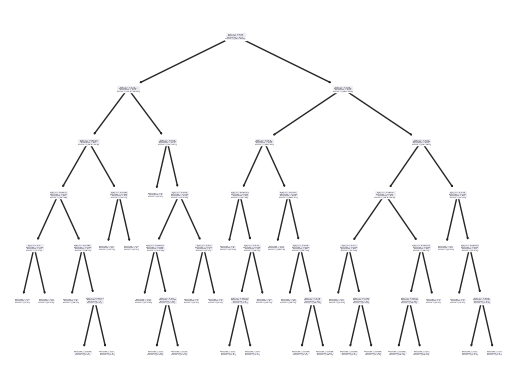

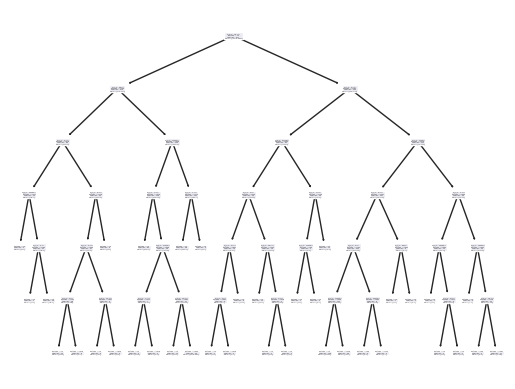

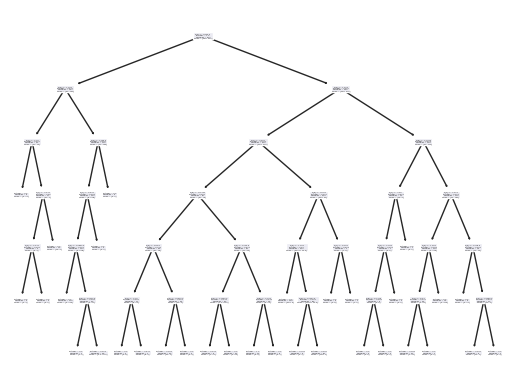

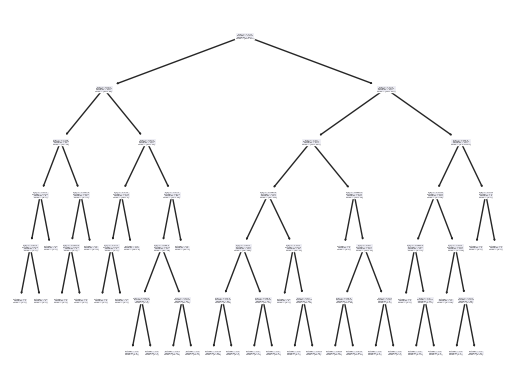

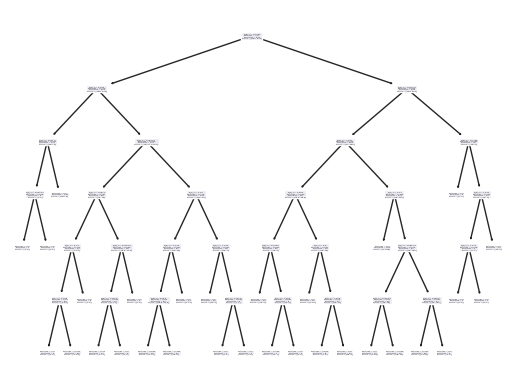

KeyboardInterrupt: 

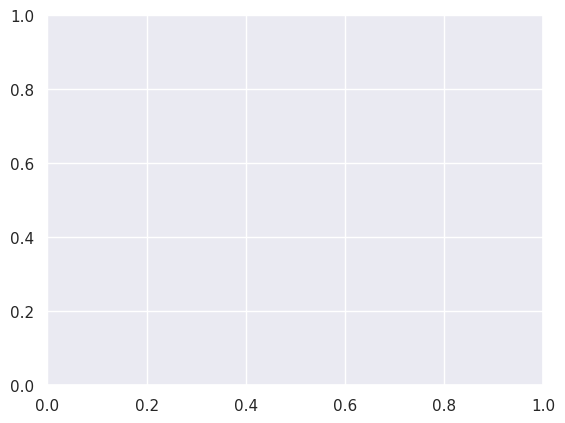

In [170]:
for i in modeloBosque.estimators_:
    tree.plot_tree(i)
    plt.show()

In [171]:
scoreBosque=modeloBosque.oob_score_
scoreBosque

0.9408163265306122

In [ ]:
jb.dump(modeloBosque, "ModeloBosque.bin", compress=True)

In [ ]:
importancia=modeloBosque.feature_importances_

In [ ]:
features=modeloBosque.feature_names_in_

In [ ]:
importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()

In [ ]:
!pip show scikit-learn

In [ ]:
a=[[0,1]]

In [ ]:
a[0][1]

##Gradient Boosting

, Gradient Tree Boosting o Gradient Boosted Regression Trees (GBRT), es una familia de algoritmos usados tanto en clasificación como en regresión basados en la combinación de modelos predictivos débiles (weak learners) -normalmente árboles de decisión- para crear un modelo predictivo fuerte. La generación de los árboles de decisión débiles se realiza de forma secuencial, creándose cada árbol de forma que corrija los errores del árbol anterior. Los aprendices suelen ser árboles "poco profundos" (shallow trees), de apenas uno, dos o tres niveles de profundidad, típicamente.

Este tipo de algoritmos suelen ofrecer los mejores resultados en escenarios tabulares, y son especialmente destacables las implementaciones de LightBGM y XGBoost.

Uno de los parámetros de este tipo de argumentos es el learning rate o tasa de aprendizaje, que controla el grado de mejora de un árbol respecto del anterior. Una tasa de aprendizaje pequeña supone una mejora más lenta pero adaptándose mejor a los datos, lo que se traduce generalmente en mejoras en el resultado a costa de un mayor consumo de recursos.

Scikit-Learn implementa esta estrategia en las clases sklearn.ensemble.GradientBoostingClassifier y sklearn.ensemble.GradientBoostingRegressor para escenarios de clasificación y regresión, respectivamente.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelogbc = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate=1.0,
                                       max_depth=1, random_state=0)
modelogbc=modelogbc.fit(X_train, y_train)
#modelogbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
modelogbc.predict(X_test)

In [ ]:
modelogbc.score(X_train, y_train)

In [ ]:
#Vamos a modificar los parámetros para escoger el mejor modelo

parametros= ParameterGrid(
    {'n_estimators':[20,40,60,80,100,120],
     'learning_rate':np.arange(0.1,1),
     'max_depth':[None,6,8,10,12,14],
     'criterion':['gini','entropy']})

In [174]:
scoreBosque=modeloArbol.score(X_test,y_test)
scoreBosque

0.9285714285714286

##XGBOOST